## Monitoria 1 - Econometría Básica
### Maestria en Economía - Universidad Javeriana
#### Introducción a Python

In [5]:
# Importamos las librerias basicas y creamos una carpeta para guardar las bases de datos 
# y otra para las graficas (en el caso de necesitarse).
import pandas as pd 
import numpy as np 
import os 

pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout) 
    pathgraphs = './graphs/'
    if not os.path.exists(pathgraphs): 
        os.mkdir(pathgraphs) 
        
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 
sns.set()


In [15]:
# Importamos la base de datos que esta en EXCEL

In [7]:

data1 = pd.read_excel(pathout + 'base1.xlsx')


In [8]:
data1

,Fecha,Inflación,Tasa de desempleo
0,2001-01-01,8.49,16.694680
1,2001-02-01,8.06,17.307023
2,2001-03-01,7.81,15.705056
3,2001-04-01,7.98,14.589864
4,2001-05-01,7.87,14.226299
...,...,...,...
230,2020-03-01,3.86,12.634106
231,2020-04-01,3.51,19.811142
232,2020-05-01,2.85,21.378492
233,2020-06-01,2.19,19.813177


In [9]:
# Cambiamos los nombres de las variables
data1.columns = ['Fecha', 'Inflacion', 'Desempleo']

In [10]:
data1

,Fecha,Inflacion,Desempleo
0,2001-01-01,8.49,16.694680
1,2001-02-01,8.06,17.307023
2,2001-03-01,7.81,15.705056
3,2001-04-01,7.98,14.589864
4,2001-05-01,7.87,14.226299
...,...,...,...
230,2020-03-01,3.86,12.634106
231,2020-04-01,3.51,19.811142
232,2020-05-01,2.85,21.378492
233,2020-06-01,2.19,19.813177


### Estadisticas descriptivas

Primero graficaremos las series

In [11]:
#Librerias para las graficas
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.dates import DateFormatter, DayLocator

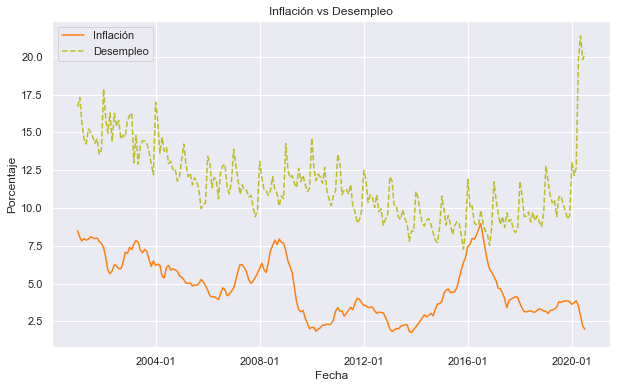

In [12]:
plt.rc('font', size=12)

#La figura se llamara ax
fig, ax = plt.subplots(figsize=(10, 6))

# Aca ponemos las variables a graficar, y algunos detalles de la grafica
ax.plot(data1.Fecha, data1.Inflacion, color='tab:orange', label='Inflación')
ax.plot(data1.Fecha, data1.Desempleo, color='tab:olive', linestyle='--',
        label='Desempleo')

# Poniendo nombres a los ejes
ax.set_xlabel('Fecha')
ax.set_ylabel('Porcentaje')
ax.set_title('Inflación vs Desempleo')
ax.grid(True)
ax.legend(loc='upper left');


#ax.xaxis.set_major_formatter(DateFormatter('%y/%m')) Esta es otra forma de mostrar la fecha en el eje x
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

In [13]:
#Si queremos quedarnos con datos del 2010 en adelante
post2010 = data1[data1.Fecha >= '2010-01-01']

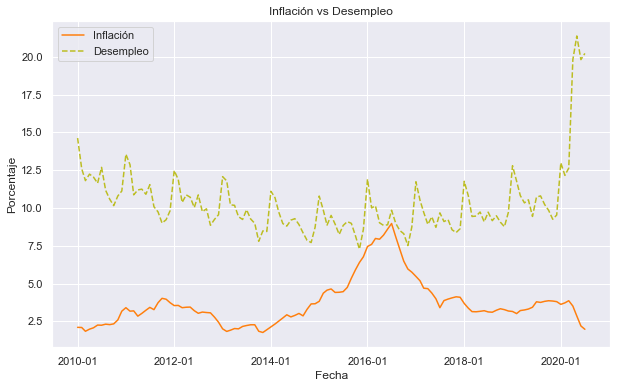

In [14]:
plt.rc('font', size=12)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(post2010.Fecha, post2010.Inflacion, color='tab:orange', label='Inflación')
ax.plot(post2010.Fecha, post2010.Desempleo, color='tab:olive', linestyle='--',
        label='Desempleo')

ax.set_xlabel('Fecha')
ax.set_ylabel('Porcentaje')
ax.set_title('Inflación vs Desempleo')
ax.grid(True)
ax.legend(loc='upper left');

ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

#### Media, desviación estándar, mediana, covarianza y correlación

In [16]:
import statistics 

In [17]:

mediainflacion = statistics.mean(data1.Inflacion)

print(mediainflacion)

4.731404255319149


In [18]:
stdinf = statistics.stdev(data1.Inflacion)

print(stdinf)

1.8706183407913255


In [19]:
from numpy import cov

In [20]:
covarianza = cov(data1.Inflacion, data1.Desempleo)
print(covarianza)

[[3.49921298 1.49487432]
 [1.49487432 6.14624175]]


In [21]:
from scipy.stats import pearsonr

In [22]:
corr  = pearsonr(data1.Inflacion, data1.Desempleo)
print(corr)

(0.3223403517590097, 4.406834081823643e-07)


### Ejercicio:

Utilice los datos de MEAPSINGLE para estudiar los efectos de los hogares donde los padres no están casados en el rendimiento académico de estudiantes en el área de matemáticas. Los datos son de escuelas en Estados Unidos para el año 2000. Las variables socioeconómicas se obtienen a nivel de código postal (donde el código postal se asigna a las escuelas según sus direcciones postales).

1. Importe los datos de la base "meansingle.dta", calcule las estadisticas descriptivas de las variables math4, pctsgle, medinc, lmedinc y free. 

2. Usted quiere estimar el efecto de los padres solteros en el desempeño escolar. Realice la regresión simple de 𝑚𝑎𝑡h4 en 𝑝𝑐𝑡𝑠𝑔𝑙𝑒 e interprete.

3. Finalmente, realice una regresion multiple agregando las variables medinc (en logaritmo) y free. Interprete.

In [28]:
#Esta base de datos esta en formato .dta
data2 = pd.read_stata(pathout + 'meapsingle.dta')


In [30]:
#Solo quiero ver los 10 primeros datos
data2.head(n=10)

,dcode,bcode,math4,read4,enroll,exppp,free,reduced,lunch,medinc,totchild,married,single,pctsgle,zipcode,lenroll,lexppp,lmedinc
0,63010,3030,92.800003,82.500000,607,6619.540039,1.000000,0.7,1.700000,110322,4076,3542,534,13.101080,48009,6.408529,8.797781,11.611158
1,63010,3133,100.000000,94.300003,370,6619.540039,0.000000,0.0,0.000000,110322,4076,3542,534,13.101080,48009,5.913503,8.797781,11.611158
2,63270,2023,72.099998,46.500000,220,5607.560059,5.900000,5.0,10.900000,65119,2524,2091,433,17.155310,48017,5.393628,8.631871,11.083972
3,63270,2978,76.099998,65.699997,356,5829.529785,8.100000,2.8,10.900000,65119,2524,2091,433,17.155310,48017,5.874931,8.670691,11.083972
4,63010,316,95.199997,80.599998,329,6619.540039,0.300000,0.3,0.600000,109313,3486,3241,245,7.028112,48025,5.796058,8.797781,11.601971
5,63010,5670,88.599998,72.699997,331,6619.540039,1.200000,0.9,2.100000,109313,3486,3241,245,7.028112,48025,5.802118,8.797781,11.601971
6,63010,1494,95.199997,90.500000,288,6619.549805,12.200000,5.2,17.400000,109313,3486,3241,245,7.028112,48025,5.662961,8.797783,11.601971
7,63130,1631,66.699997,46.299999,452,6092.660156,50.200001,17.5,67.699997,43750,4651,3258,1393,29.950546,48030,6.113682,8.714840,10.686247
8,63130,1753,83.900002,44.599998,428,5155.399902,40.200001,10.0,50.200001,43750,4651,3258,1393,29.950546,48030,6.059123,8.547800,10.686247
9,63130,2254,95.699997,56.500000,238,6095.709961,24.400000,17.6,42.000000,43750,4651,3258,1393,29.950546,48030,5.472270,8.715341,10.686247


In [31]:
#Estadisticas descriptivas de math4, pctsgle, medinc, lmedinc y free

In [32]:
statistics.mean(data2.math4)


80.65807846435814

In [33]:
statistics.stdev(data2.math4)


15.808616412113512

In [34]:
statistics.median(data2.math4)


85.69999694824219

In [35]:
statistics.mode(data2.math4)


100.0

#### Regresión Simple

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [37]:
X = data2.pctsgle
Y = data2.math4
X = sm.add_constant(X)

modelo1 = sm.OLS(endog=Y, exog=X,)
modelo1 = modelo1.fit()
print(modelo1.summary())


                            OLS Regression Results                            
Dep. Variable:                  math4   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.54e-25
Time:                        16:14:09   Log-Likelihood:                -901.95
No. Observations:                 229   AIC:                             1808.
Df Residuals:                     227   BIC:                             1815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.7704      1.597     60.603      0.0

#### Regresión Multiple

In [38]:
#En la base ya teneos la variable en log, pero vamos a crear una nosotros:

logmedinc = np.log(data2.medinc)


In [39]:
#Nuestra variable
logmedinc

0      11.611159
1      11.611159
2      11.083972
3      11.083972
4      11.601971
         ...    
224    10.773253
225    10.876007
226    10.993379
227    10.993379
228    10.713150
Name: medinc, Length: 229, dtype: float64

In [40]:
#La variale de la base de datos
data2.lmedinc

0      11.611158
1      11.611158
2      11.083972
3      11.083972
4      11.601971
         ...    
224    10.773252
225    10.876007
226    10.993379
227    10.993379
228    10.713150
Name: lmedinc, Length: 229, dtype: float32

In [67]:
#En una matriz incluiremos todos nuestros regresores. Esta matriz se llamara XM
XM = data2[['pctsgle', 'free']].copy()
XM['logmedinc'] = logmedinc
#Añadimos una constante
XM = sm.add_constant(XM)

In [69]:
#Nuestras variables independientes

XM

,const,pctsgle,free,logmedinc
0,1.0,13.101080,1.000000,11.611159
1,1.0,13.101080,0.000000,11.611159
2,1.0,17.155310,5.900000,11.083972
3,1.0,17.155310,8.100000,11.083972
4,1.0,7.028112,0.300000,11.601971
...,...,...,...,...
224,1.0,22.107969,24.799999,10.773253
225,1.0,20.447109,13.900000,10.876007
226,1.0,17.508417,25.100000,10.993379
227,1.0,17.508417,20.799999,10.993379


In [70]:
#Regresión Multiple
modelo2 = sm.OLS(endog=Y, exog=XM,)
modelo2 = modelo2.fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  math4   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     63.85
Date:                Sun, 09 May 2021   Prob (F-statistic):           6.63e-30
Time:                        16:24:13   Log-Likelihood:                -886.08
No. Observations:                 229   AIC:                             1780.
Df Residuals:                     225   BIC:                             1794.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7238     58.478      0.884      0.3

Ahora exportemos las dos regresiones en una sola tabla Latex

In [72]:
from pystout import pystout

In [73]:
pystout(models=[modelo1,modelo2],
        file='tabla1.tex',
       
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Errores estándar en paréntesis.'],
        digits=3,
        endog_names=['Reg. Simple','Reg. Multiple'],
        varlabels={'const':'Constante','displacement':'Disp','mpg':'MPG'},
        
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

Parece que hay una correlación muy alta entre nuestros regresores. Vamos a probarlo.

In [45]:
Xnc = data2[['pctsgle', 'lmedinc', 'free']]
Xnc.corr(method='pearson')


,pctsgle,lmedinc,free
pctsgle,1.000000,-0.868636,0.826357
lmedinc,-0.868636,1.000000,-0.746971
free,0.826357,-0.746971,1.000000


Hay una correlación muy alta entre nuestra variable de interés pctsgle y los controles.